# Pymaceuticals Inc.
---

### Analysis

* Bar chart shows Drug Regimen Capomulin has the maximum mice number (230), and Zoniferol has the smaller mice number (182). Total number of mice is 249. 
* Pie Chart shows gender breakdown of mice. There is almost even numbers of male and female mice(50.6% were male, 49.4% were female). The average tumor volume between both genders are relatively close, as well.
* Summary Statistics shows Capomulin and Ramicane both have the lowest mean, median, variance, standard deviation, and standard error of the mean compared to the other treatment regimens. This may suggest that Capomulin and Ramicane are better for reducing the volume of tumor compared to the other treatments.
* LInear regression model shows the correlation between mouse weight, and average tumor volume is 0.84. It is a strong positive correlation, when the mouse weight increases the average tumor volume also increases. The regression analysis helped to understand how much the average tumor volume will change when weight of mice change. 

 

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

combine_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combine_df.head(100)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
95,u364,Capomulin,Male,18,17,0,45.000000,0
96,u364,Capomulin,Male,18,17,5,45.760886,1
97,u364,Capomulin,Male,18,17,10,46.568417,2
98,u364,Capomulin,Male,18,17,15,47.212200,2


In [10]:
# Checking the number of mice.
numberof_mice= len(mouse_metadata)
print(numberof_mice)

249


In [11]:
# Our data 0should be uniquely identified by Mouse ID and Timepoint
print(len(combine_df))
df = combine_df.groupby(["Mouse ID", "Timepoint"])
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
grouped_df = df['Sex'].count() #.sort_values(ascending=False)
values = grouped_df.values
duplicated_index = []
for idx in range(len(values)):
    if values[idx] > 1:
        print(grouped_df.index[idx])
        duplicated_index.append(grouped_df.index[idx])


1893
('g989', 0)
('g989', 5)
('g989', 10)
('g989', 15)
('g989', 20)


In [12]:
# Optional:Get all the data for the duplicate mouse ID. 
for d in duplicated_index:
#     print(df.loc[d])
    for i, r in combine_df.iterrows():
        if r['Mouse ID'] == d[0] and r['Timepoint'] == d[1]:
            print(r)

Mouse ID                  g989
Drug Regimen          Propriva
Sex                     Female
Age_months                  21
Weight (g)                  26
Timepoint                    0
Tumor Volume (mm3)        45.0
Metastatic Sites             0
Name: 908, dtype: object
Mouse ID                  g989
Drug Regimen          Propriva
Sex                     Female
Age_months                  21
Weight (g)                  26
Timepoint                    0
Tumor Volume (mm3)        45.0
Metastatic Sites             0
Name: 909, dtype: object
Mouse ID                   g989
Drug Regimen           Propriva
Sex                      Female
Age_months                   21
Weight (g)                   26
Timepoint                     5
Tumor Volume (mm3)    48.786801
Metastatic Sites              0
Name: 910, dtype: object
Mouse ID                   g989
Drug Regimen           Propriva
Sex                      Female
Age_months                   21
Weight (g)                   26
Timepoint    

In [13]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combine_df.drop_duplicates(
  subset = ['Mouse ID', 'Timepoint'],
  keep = 'last').reset_index(drop = True)
print(len(clean_df))

1888


In [14]:
# Checking the number of mice in the clean DataFrame.
len(clean_df["Mouse ID"].unique())

249

## Summary Statistics

In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
by_regimen_df = clean_df.groupby(["Drug Regimen"])

r_mean = by_regimen_df["Tumor Volume (mm3)"].mean()
r_medain= by_regimen_df["Tumor Volume (mm3)"].median()
r_variance= by_regimen_df["Tumor Volume (mm3)"].var()
r_std= by_regimen_df["Tumor Volume (mm3)"].std()
r_sem= by_regimen_df["Tumor Volume (mm3)"].sem()

tumorvolume_df= pd.DataFrame({
    "Mean":r_mean,
    "Median":r_medain,
    "Variance":r_variance,
    "STD":r_std,
    "SEM":r_sem
})

tumorvolume_df



,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [16]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
by_regimen_df.agg({
    "Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]
})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.382993  50.783528  43.220205  6.574208  0.526358
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64


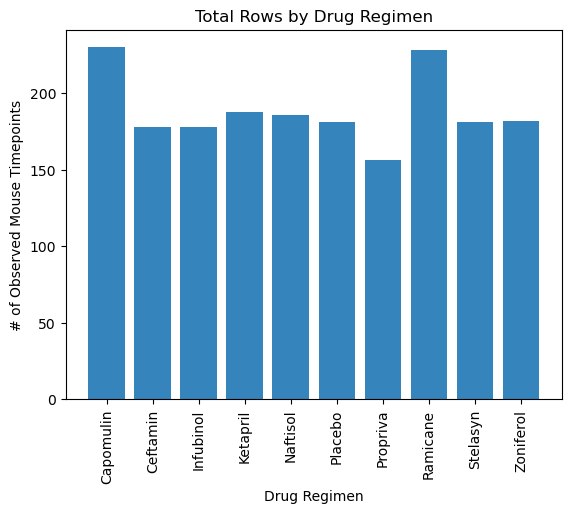

In [22]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
countstimepoint= by_regimen_df["Timepoint"].count()
print(countstimepoint)
# y_pos = np.arange(len(countstimepoint.index))
plt.bar(countstimepoint.index, countstimepoint.values, alpha=0.9)

plt.title('Total Rows by Drug Regimen')
plt.xlabel('Drug Regimen')
plt.xticks(rotation=90)
plt.ylabel('# of Observed Mouse Timepoints')


plt.show()

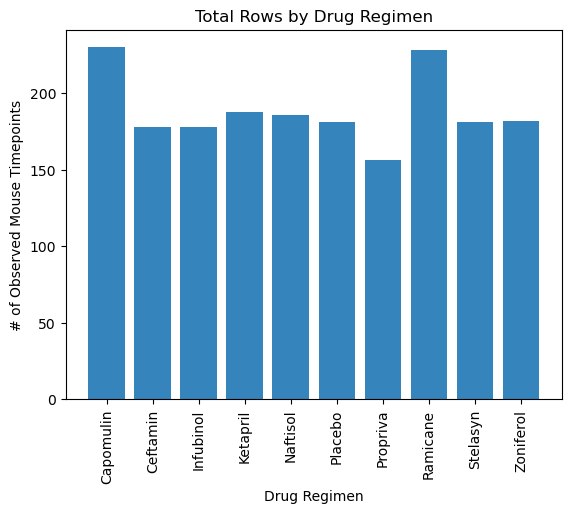

In [24]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
countstimepoint = by_regimen_df["Timepoint"].count()

# Generate a bar plot using Pandas
plt.bar(countstimepoint.index, countstimepoint.values, alpha=0.9)
plt.title('Total Rows by Drug Regimen')
plt.xlabel('Drug Regimen')
plt.xticks(rotation=90)
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()



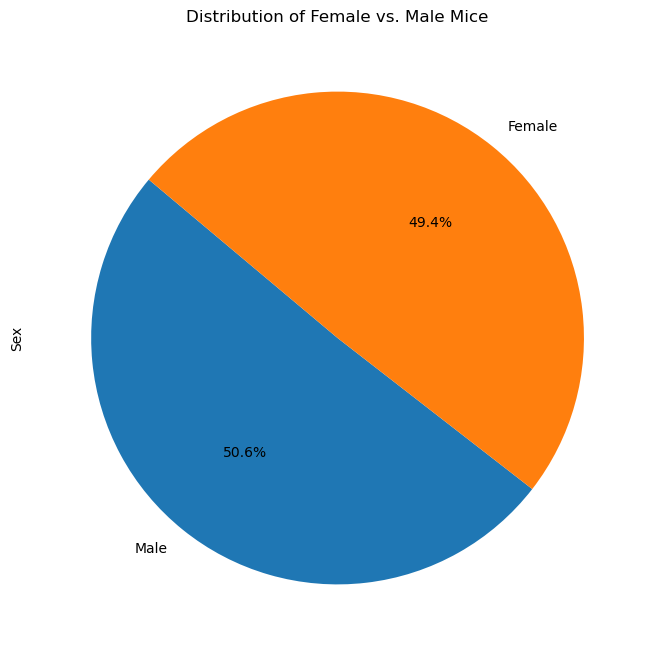

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_distribution = combine_df['Sex'].value_counts()

# Generate a pie plot using Pandas
sex_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, figsize=(8, 8))

# Set the title
plt.title('Distribution of Female vs. Male Mice')

# Display the plot
plt.show()

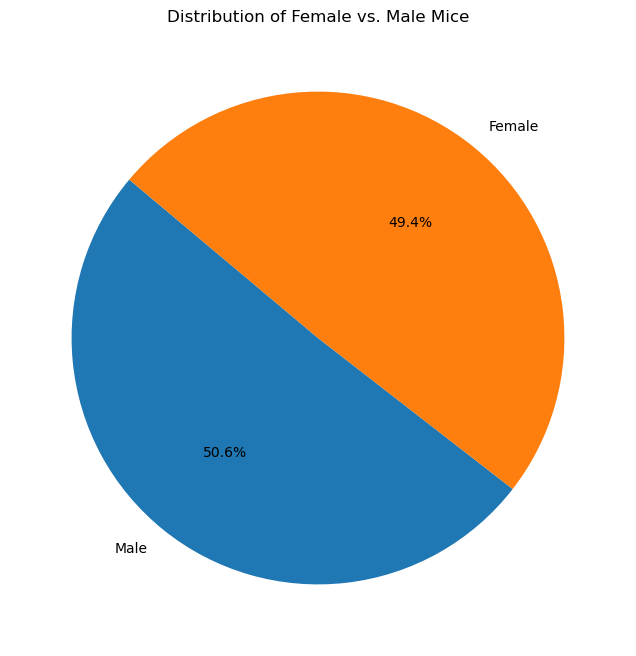

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_distribution = combine_df['Sex'].value_counts()

# Generate a pie plot using pyplot
plt.figure(figsize=(8, 8))
plt.pie(sex_distribution, labels=sex_distribution.index, autopct='%1.1f%%', startangle=140)

# Set the title
plt.title('Distribution of Female vs. Male Mice')

# Display the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [29]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  


# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = combine_df.groupby('Mouse ID')['Timepoint'].max()
max_timepoint_df = pd.DataFrame(max_timepoint)
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

final_tumor_volume = pd.merge(max_timepoint_df, combine_df, on=['Mouse ID', 'Timepoint'])
final_tumor_volume = final_tumor_volume[final_tumor_volume['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]


print(final_tumor_volume[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']])


    Mouse ID Drug Regimen  Tumor Volume (mm3)
0       a203    Infubinol           67.973419
1       a251    Infubinol           65.525743
3       a275     Ceftamin           62.999356
6       a411     Ramicane           38.407618
7       a444     Ramicane           43.047543
..       ...          ...                 ...
239     y769     Ceftamin           68.594745
240     y793    Capomulin           31.896238
241     y865     Ceftamin           64.729837
245     z578     Ramicane           30.638696
246     z581    Infubinol           62.754451

[100 rows x 3 columns]


In [30]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = final_tumor_volume['Drug Regimen'].unique()

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_data.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    lower_bound = lower_q - (1.5 * iqr)
    upper_bound = upper_q + (1.5 * iqr)
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    
    print(f"{treatment}'s potential outliers: {outliers}")

Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


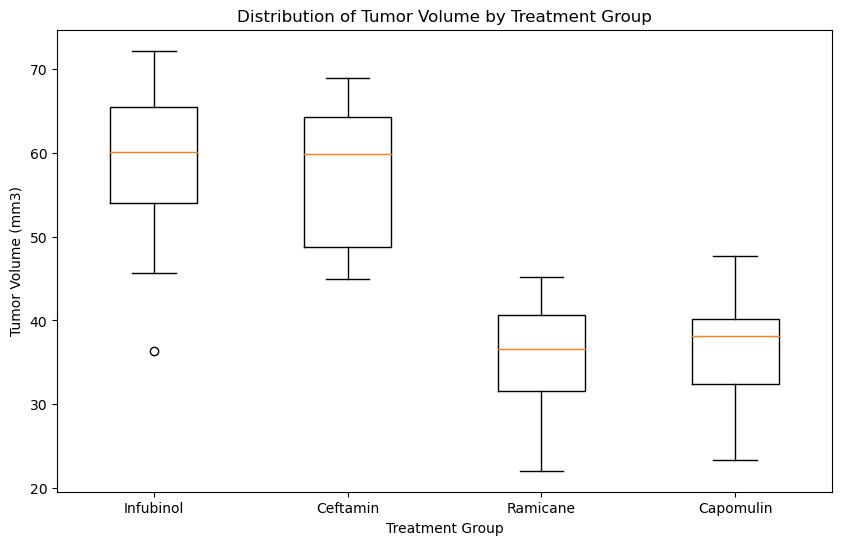

In [32]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
treatment_groups = final_tumor_volume['Drug Regimen'].unique()
tumor_volumes = []

for group in treatment_groups:
    group_data = final_tumor_volume[final_tumor_volume['Drug Regimen'] == group]['Tumor Volume (mm3)']
    tumor_volumes.append(group_data)

# Generate the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_volumes, labels=treatment_groups)
plt.title('Distribution of Tumor Volume by Treatment Group')
plt.xlabel('Treatment Group')
plt.ylabel('Tumor Volume (mm3)')

# Display the plot
plt.show()


## Line and Scatter Plots

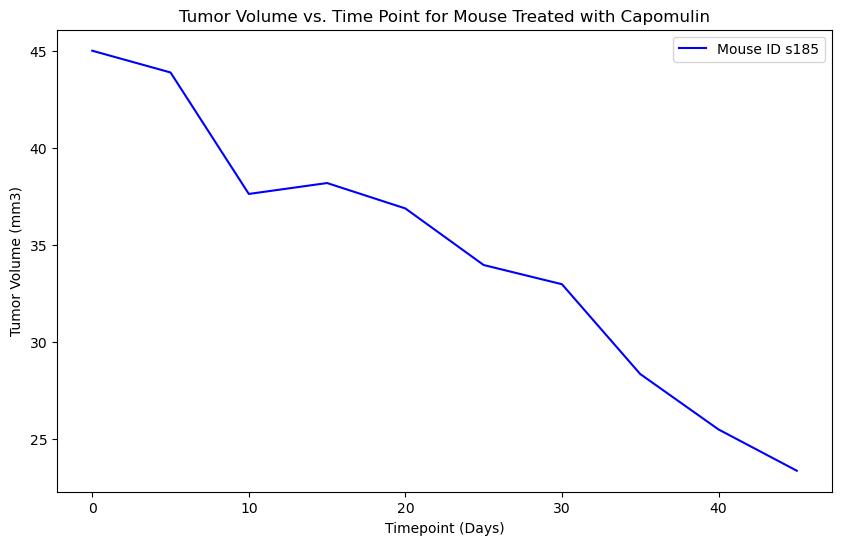

In [35]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 's185'
capomulin_data = combine_df[(combine_df['Drug Regimen'] == 'Capomulin') & (combine_df['Mouse ID'] == mouse_id)]
plt.figure(figsize=(10, 6))
plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'], color='b', label=f'Mouse ID {mouse_id}')


plt.title('Tumor Volume vs. Time Point for Mouse Treated with Capomulin')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')


plt.legend()


plt.show()

## Correlation and Regression

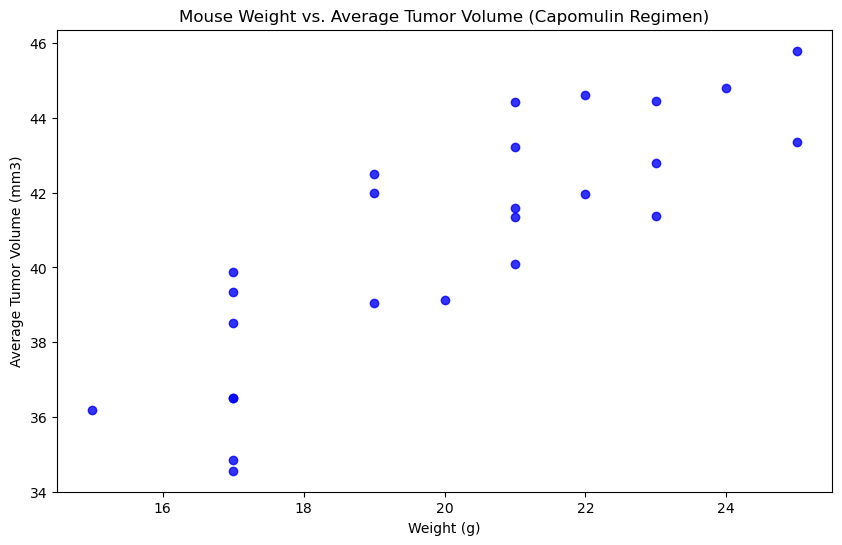

In [36]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_data = combine_df[combine_df['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Get the corresponding weight for each mouse
mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].unique().apply(lambda x: x[0])

# Generate the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weights, average_tumor_volume, color='blue', alpha=0.8)

# Set the title and labels
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Display the plot
plt.show()


The correlation between mouse weight and the average tumor volume is 0.84


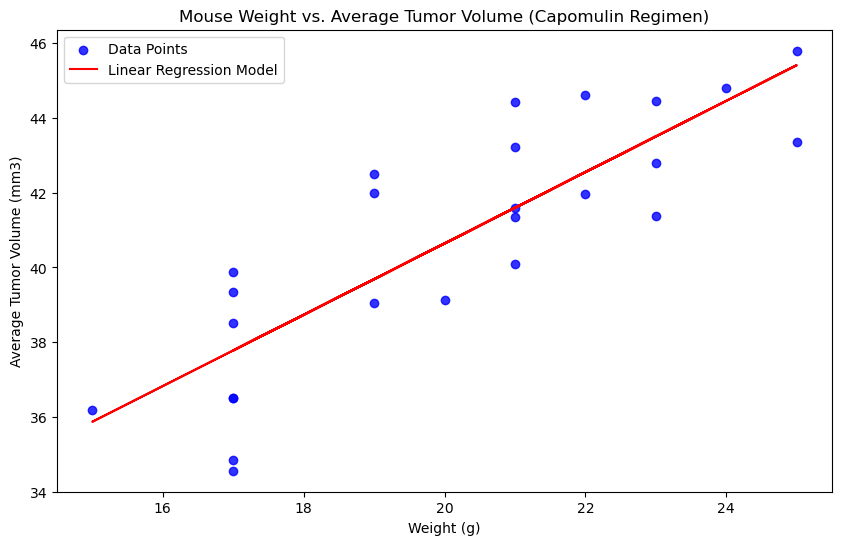

In [39]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import pearsonr, linregress

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(mouse_weights, average_tumor_volume)

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = linregress(mouse_weights, average_tumor_volume)

# Print the correlation coefficient and regression parameters
print(f'The correlation between mouse weight and the average tumor volume is {correlation_coefficient:.2f}')


plt.figure(figsize=(10, 6))
plt.scatter(mouse_weights, average_tumor_volume, color='blue', alpha=0.8, label='Data Points')

regression_line = slope * mouse_weights + intercept


plt.plot(mouse_weights, regression_line, color='red', label='Linear Regression Model')


plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')


plt.legend()


plt.show()
